Initial dataset shape: (918, 12)
Missing values: 0
Removed 0 duplicate rows.
One-hot encoding applied on: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
Final columns: ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']

 Sample Predictions:

   Actual  Predicted  Probability                         Message
0       1          1        0.981      You may have heart disease
1       1          0        0.132  You may not have heart disease
2       1          1        0.966      You may have heart disease
3       1          1        0.563      You may have heart disease
4       0          0        0.154  You may not have heart disease
5       0          0        0.346  You may not have heart disease
6       0          0        0.014  You may not have heart disease
7       1    

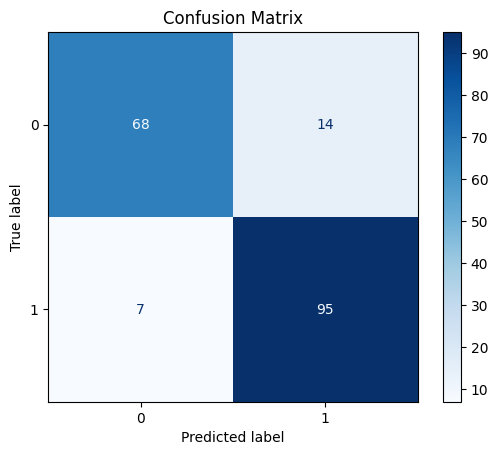

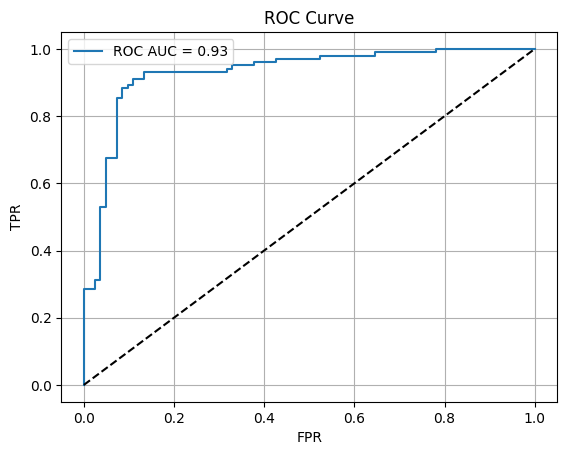

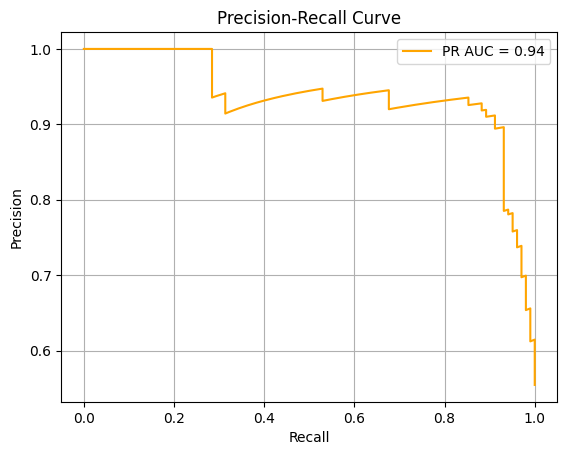


 Cross-Validation Accuracy: 0.8278 ± 0.0355


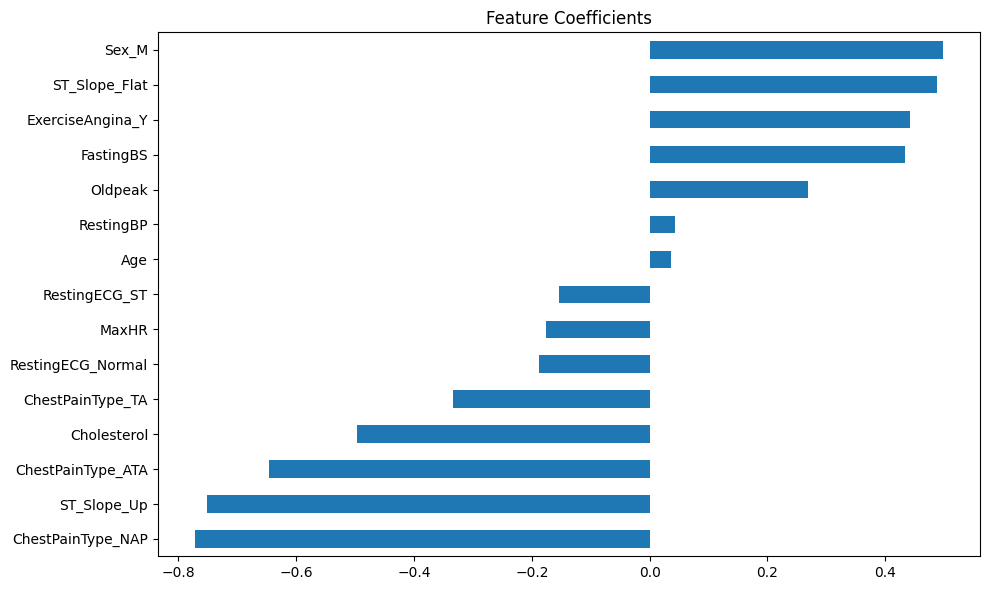


 Final Model Summary:

               Metric   Score
0            Accuracy  0.8859
1             ROC AUC  0.9297
2              PR AUC  0.9361
3  Cross-Val Accuracy  0.8278


In [ ]:
# Heart Disease Prediction using Logistic Regression
# Dataset: heart.csv (CODTECH Task-2)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, roc_auc_score, precision_recall_curve, auc
)

# Load Dataset
df = pd.read_csv("heart.csv")
print("Initial dataset shape:", df.shape)

# Data Cleaning
print("Missing values:", df.isnull().sum().sum())

# Drop duplicates
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print(f"Removed {before - after} duplicate rows.")

# One-Hot Encoding for categorical columns
# Only these columns are categorical
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("One-hot encoding applied on:", categorical_cols)
print("Final columns:", df.columns.tolist())

# Feature & Target Split

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Prediction & Readable Output

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

messages = ['You may have heart disease' if pred == 1 else 'You may not have heart disease'
            for pred in y_pred]

pred_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Probability': y_prob.round(3),
    'Message': messages
})

print("\n Sample Predictions:\n")
print(pred_df.head(10))

# Evaluation

print(f"\n Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\n Classification Report:\n", classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.grid(True)
plt.show()

precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.2f}", color='orange')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.show()

# Cross Validation

cv = cross_val_score(model, scaler.transform(X), y, cv=5)
print(f"\n Cross-Validation Accuracy: {cv.mean():.4f} ± {cv.std():.4f}")


# Feature Coefficients

coefficients = pd.Series(model.coef_[0], index=X.columns)
coefficients.sort_values().plot(kind='barh', figsize=(10,6), title="Feature Coefficients")
plt.tight_layout()
plt.show()

# Summary Table

summary = pd.DataFrame({
    'Metric': ['Accuracy', 'ROC AUC', 'PR AUC', 'Cross-Val Accuracy'],
    'Score': [accuracy_score(y_test, y_pred), roc_auc, pr_auc, cv.mean()]
})
print("\n Final Model Summary:\n")
print(summary.round(4))
